# Shell Element Responses (Pyvista)

In [1]:
import openseespy.opensees as ops

import opstool as opst
import opstool.vis.pyvista as opsvis


In [2]:
opst.load_ops_examples("Dam-Brick")

ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
opst.pre.gen_grav_load(direction="Z", factor=-9.81)

{1: [0.0, 0.0, -108.44173375630247],
 2: [0.0, 0.0, -54.220866878151384],
 3: [0.0, 0.0, -230.7140352741463],
 4: [0.0, 0.0, -115.35701763707345],
 5: [0.0, 0.0, -211.6230296952199],
 6: [0.0, 0.0, -105.81151484761027],
 7: [0.0, 0.0, -449.06604167743774],
 8: [0.0, 0.0, -224.5330208387195],
 9: [0.0, 0.0, -108.44173375630217],
 10: [0.0, 0.0, -230.71403527414571],
 11: [0.0, 0.0, -211.62302969521937],
 12: [0.0, 0.0, -449.06604167743654],
 13: [0.0, 0.0, -108.44173375630217],
 14: [0.0, 0.0, -230.714035274146],
 15: [0.0, 0.0, -211.62302969521937],
 16: [0.0, 0.0, -449.0660416774371],
 17: [0.0, 0.0, -108.44173375630217],
 18: [0.0, 0.0, -230.71403527414603],
 19: [0.0, 0.0, -211.62302969521937],
 20: [0.0, 0.0, -449.0660416774375],
 21: [0.0, 0.0, -108.44173375630217],
 22: [0.0, 0.0, -230.71403527414571],
 23: [0.0, 0.0, -211.62302969521937],
 24: [0.0, 0.0, -449.0660416774372],
 25: [0.0, 0.0, -108.44173375630217],
 26: [0.0, 0.0, -230.71403527414571],
 27: [0.0, 0.0, -211.62302969

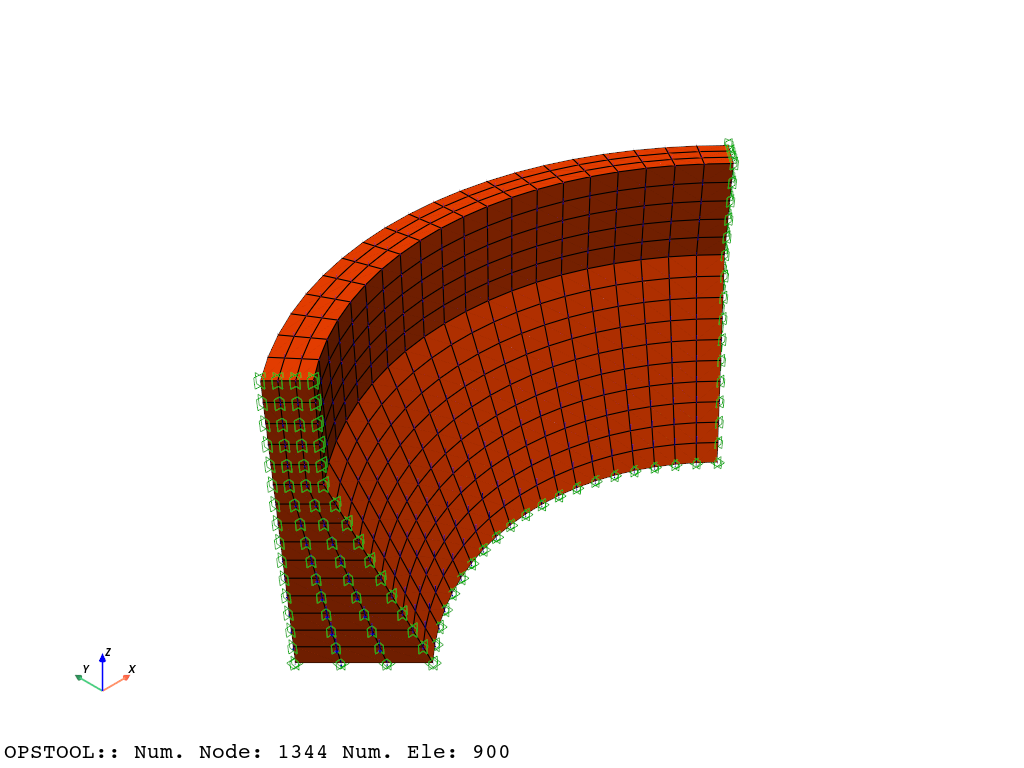

In [3]:
opsvis.set_plot_props(point_size=0, line_width=3, notebook=True)
fig = opsvis.plot_model(show_nodal_loads=True, show_ele_loads=True)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

In [4]:
ops.constraints("Transformation")
ops.numberer("RCM")
ops.system("BandGeneral")
ops.test("NormDispIncr", 1.0e-12, 6, 2)
ops.algorithm("Linear")
ops.integrator("LoadControl", 0.1)
ops.analysis("Static")

In [5]:
ODB = opst.post.CreateODB(odb_tag=1)
for i in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with _odb_tag = 1 saved in .opstool.output/RespStepData-1.nc!

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

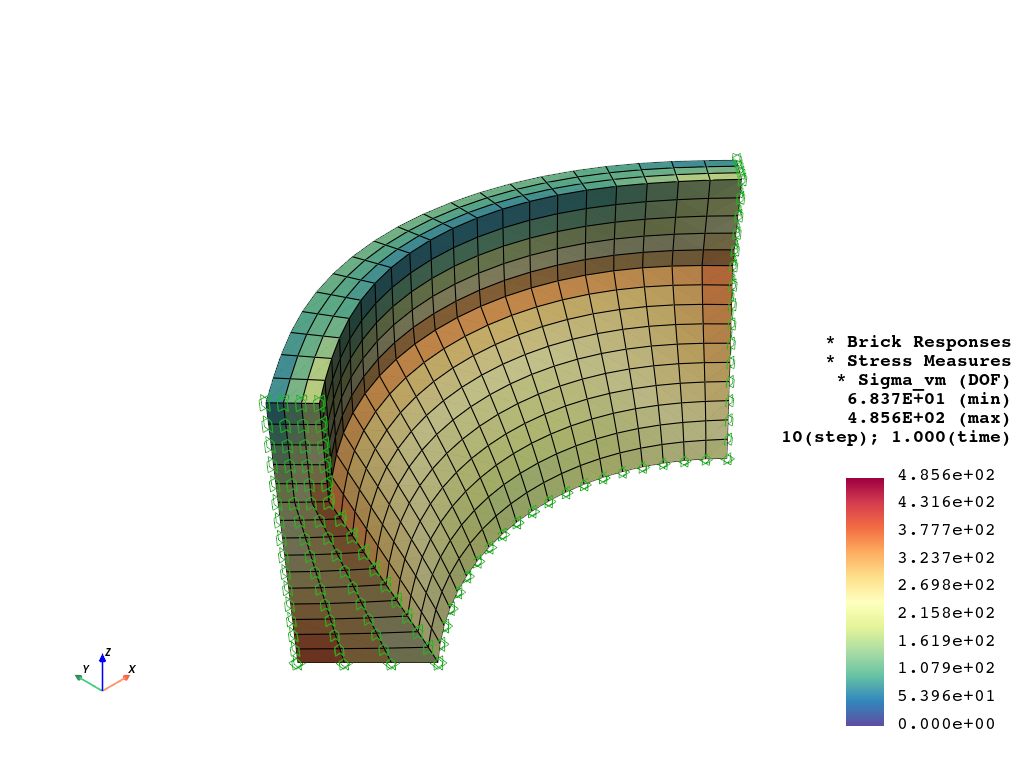

In [6]:
opsvis.set_plot_props(cmap="Spectral_r", point_size=0.0, notebook=True)

fig = opsvis.plot_unstruct_responses(
    odb_tag=1,
    slides=False,
    step="absMax",
    ele_type="Brick",
    resp_type="stresses",
    resp_dof="sigma_vm",
    show_defo=True,
    defo_scale=1.5,
    show_model=True,
)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

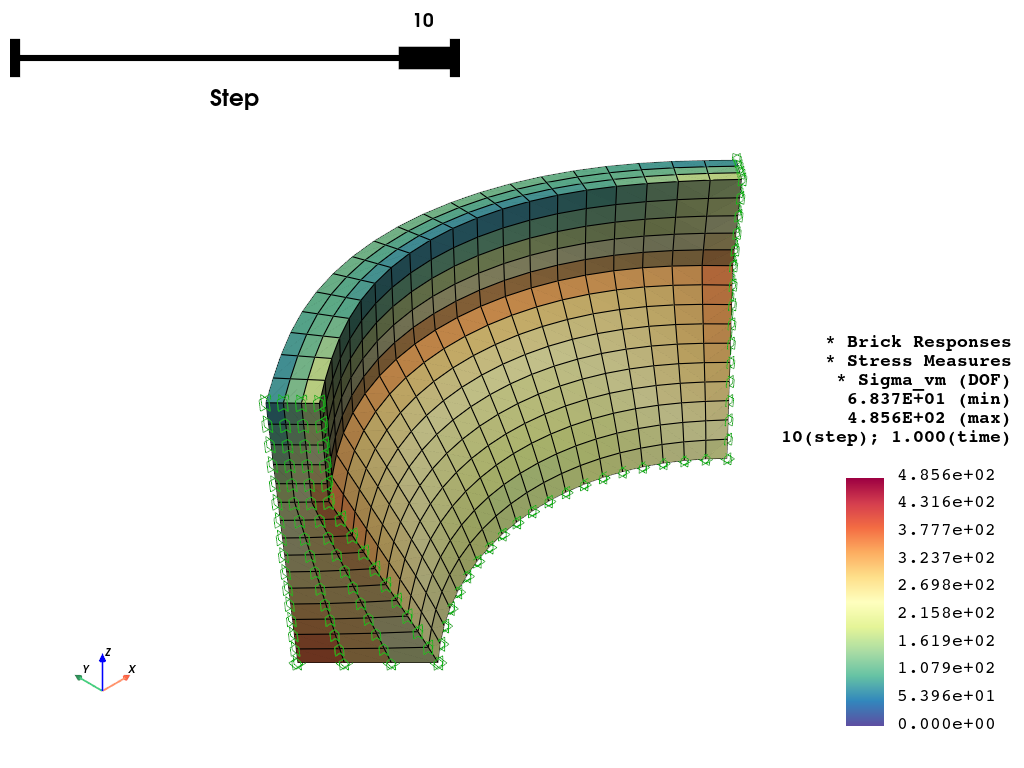

In [7]:
fig = opsvis.plot_unstruct_responses(
    odb_tag=1,
    slides=True,
    ele_type="Brick",
    resp_type="stresses",
    resp_dof="sigma_vm",
    show_model=False,
    show_defo=True,
    defo_scale=1.5,
)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

In [8]:
fig = opsvis.plot_unstruct_responses_animation(
    odb_tag=1,
    ele_type="Brick",
    resp_type="stresses",
    resp_dof="sigma_vm",
    savefig="images/BrickRespAnimation.gif",
    framerate=2,
    show_model=True,
    show_defo=True,
    defo_scale=1.5,
)
fig.close()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

Animation has been saved as images/BrickRespAnimation.gif!


![BrickRespAnimation](images/BrickRespAnimation.gif)